In [1]:
%autosave 60

Autosaving every 60 seconds


In [2]:
%run init.ipynb
%run init-tensor_product.ipynb
%run init-quantum_resources.ipynb
%run init-optical_elements.ipynb

In [3]:
from qiskit.quantum_info import entropy, DensityMatrix

In [4]:
%run init-qiskit.ipynb

C:\Users\stark\AppData\Local\Temp\ipykernel_24692\1918398002.py:6: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
ibmqfactory.load_account:WARNING:2023-05-24 11:34:41,199: Credentials are already in use. The existing account in the session will be replaced.


ibm_peekskill                ibm_perth                    ibm_nairobi
-------------                ---------                    -----------
Num. Qubits:  27             Num. Qubits:  7              Num. Qubits:  7
Pending Jobs: 18             Pending Jobs: 184            Pending Jobs: 200
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      357.5          Avg. T1:      179.8          Avg. T1:      114.0
Avg. T2:      356.4          Avg. T2:      134.3          Avg. T2:      71.0



ibm_lagos                    ibmq_manila                  ibmq_jakarta
---------                    -----------                  ------------
Num. Qubits:  7              Num. Qubits:  5              Num. Qubits:  7
Pending Jobs: 182            Pending Jobs: 21             Pending Jobs: 44
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True          

In [5]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.20.2', 'qiskit-aer': '0.10.4', 'qiskit-ignis': '0.7.1', 'qiskit-ibmq-provider': '0.19.1', 'qiskit-aqua': None, 'qiskit': '0.36.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [6]:
%run init-qiskit_optical_elements.ipynb

In [7]:
device = provider.get_backend('ibm_nairobi')

# Irrealidade do caminho $b$ dentro do IMZ

## BBO$_{p}$ - Dentro do IMZ - QWP$_{in}$

<img src = 'setup_realism.jpg' width = '90%'>

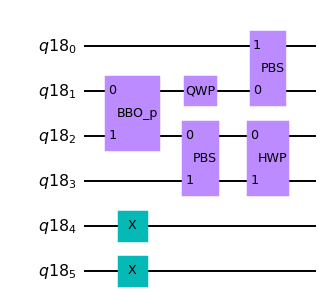

In [8]:
def qc_QCRb_in(th):
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr, name = 'QCR')
    qc_BBO_p_ = qc_BBO_p(th); qc.append(qc_BBO_p_, [qr[1],qr[2]])              # BBO_p
    qc_QWP_ = qc_QWP(); qc.append(qc_QWP_, [qr[1]])                            # QWP
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[1],qr[0]])                      # PBS_A
    # IMZ
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[2],qr[3]])                      # PBS
    qc_HWP_ = qc_HWP(); qc.append(qc_HWP_, [qr[2],qr[3]])                      # HWP
    qc.x(4); qc.x(5)                                                           # Atoms's innitial state
    #qc_AtmInt_ = qc_AtmInt(); qc.append(qc_AtmInt_, [qr[3],qr[4],qr[5]])      # Atoms' interaction
    #qc_M_ = qc_M(); qc.append(qc_M_, [qr[3]])                                 # Mirrors
    #qc_PS_ = qc_PS(ph); qc.append(qc_PS_, [qr[3]])                            # Phase
    #qc_BS_ = qc_BS(); qc.append(qc_BS_, [qr[3]])                              # BS
    return qc
qc_QCRb_in_ = qc_QCRb_in(math.pi); qc_QCRb_in_.draw(output = 'mpl', scale = 0.7)

## Retrieve $b_{in}$ 

In [9]:
f = open("jobs_ids_b_in.txt","r")
list_ids_b_in_ = f.read().replace("'","").replace(" ","").replace("[","").replace("]","").split(",")
f.close()

In [10]:
list_ids_b_in_

['chb0nc0dickn60j1i23g',
 'chb1fl5v6mngo8m6h6l0',
 'chb5628fdairicmktu60',
 'chb8u1pmfb1ddb4vccb0',
 'chbckvoo51arsodcbrbg',
 'chbfp70o51arsode4alg',
 'chbgbilv6mngo8mib9p0',
 'chbhv5lv6mngo8mjavhg',
 'chbk249mfb1ddb55e200',
 'chbnos44cg5fl02loklg',
 'chbosipmfb1ddb58sfa0',
 'chbrfi5v6mngo8mpokd0',
 'chc4hioq13ef4a8f6kmg',
 'chc8c18o51arsodsrlrg',
 'chce3e0o51arsoe22k80',
 'chcf125v6mngo8n6qpe0',
 'chcf8v176h9ab2d3r7u0',
 'chcfha976h9ab2d453b0',
 'chcfp5dv6mngo8n7lrng',
 'chcjja8fdairicnkqb20',
 'chcpcdp76h9ab2dcnptg']

In [11]:
thmax = math.pi-0.01;   dth = thmax/20; th = np.arange(0.01, thmax+dth, dth); d = th.shape[0]
ret_rhob_AbWZ_in             = np.zeros(th.shape[0], dtype=object)
ret_rhob_AbWZ_out            = np.zeros(th.shape[0], dtype=object)
ret_rhob_0bWZ_in             = np.zeros(th.shape[0], dtype=object)
ret_rhob_0bWZ_out            = np.zeros(th.shape[0], dtype=object)
ret_Phi_b_0bWZ_in            = np.zeros(th.shape[0], dtype=object)
ret_Phi_b_0bWZ_out           = np.zeros(th.shape[0], dtype=object)
ret_Irr_b_in                 = np.zeros(th.shape[0])
ret_Irr_b_out                = np.zeros(th.shape[0])

In [12]:
print(device)
for j in range(0, d):
    print(list_ids_b_in_[j])
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
    qc_QCRb_in_ = qc_QCRb_in(th[j]); qc.append(qc_QCRb_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
    job_ret_b_in = device.retrieve_job(list_ids_b_in_[j])
    qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
    print(job_ret_b_in.job_id())
    qstf = StateTomographyFitter(job_ret_b_in.result(), qstc)
    #
    # rho
    #
    ret_rhob_AbWZ_in[j] = qstf.fit(method='lstsq')
    ret_rhob_0bWZ_in[j] = projM_np(8, '0', ret_rhob_AbWZ_in[j])
    ret_Phi_b_0bWZ_in[j] = dephasing_map_3qubits_np(ret_rhob_0bWZ_in[j])
    ret_Irr_b_in[j] = entropy(ret_Phi_b_0bWZ_in[j]) - entropy(ret_rhob_0bWZ_in[j])
    print(ret_Irr_b_in[j])
    print('j = {:2d}  - theta = {}'.format(j, th[j]))

ibm_nairobi
chb0nc0dickn60j1i23g
chb0nc0dickn60j1i23g
0.018987056255594492
j =  0  - theta = 0.01
chb1fl5v6mngo8m6h6l0
chb1fl5v6mngo8m6h6l0
0.04801487611629862
j =  1  - theta = 0.16657963267948966
chb5628fdairicmktu60
chb5628fdairicmktu60
0.14927440992896357
j =  2  - theta = 0.3231592653589793
chb8u1pmfb1ddb4vccb0
chb8u1pmfb1ddb4vccb0
0.2133427402368454
j =  3  - theta = 0.479738898038469
chbckvoo51arsodcbrbg
chbckvoo51arsodcbrbg
0.29018166010561164
j =  4  - theta = 0.6363185307179586
chbfp70o51arsode4alg
chbfp70o51arsode4alg
0.3833800025398766
j =  5  - theta = 0.7928981633974483
chbgbilv6mngo8mib9p0
chbgbilv6mngo8mib9p0
0.46044732269099853
j =  6  - theta = 0.9494777960769379
chbhv5lv6mngo8mjavhg
chbhv5lv6mngo8mjavhg
0.5221012136705849
j =  7  - theta = 1.1060574287564275
chbk249mfb1ddb55e200
chbk249mfb1ddb55e200
0.5298971498306021
j =  8  - theta = 1.2626370614359173
chbnos44cg5fl02loklg
chbnos44cg5fl02loklg
0.5349601201806012
j =  9  - theta = 1.419216694115407
chbosipmfb1ddb58s

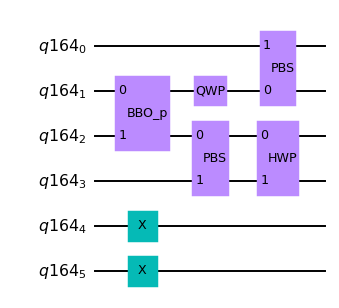

In [13]:
qc.decompose().draw(output = 'mpl', scale = 0.7)

In [14]:
for j in range(0,d):
    ret_rhob_0bWZ_in[j] = projM_np(8, '0', ret_rhob_AbWZ_in[j])
    ret_Phi_b_0bWZ_in[j] = dephasing_map_3qubits_np(ret_rhob_0bWZ_in[j])
    ret_Irr_b_in[j] = entropy(ret_Phi_b_0bWZ_in[j]) - entropy(ret_rhob_0bWZ_in[j])
    print(ret_Irr_b_in[j])

0.018987056255594492
0.04801487611629862
0.14927440992896357
0.2133427402368454
0.29018166010561164
0.3833800025398766
0.46044732269099853
0.5221012136705849
0.5298971498306021
0.5349601201806012
0.5222777796382683
0.5348456726263274
0.47825150262170457
0.4031332862025323
0.3342801365526341
0.21981974620756806
0.14904974572909224
0.06765554611756497
0.03616602104092492
0.009820341851665582
0.02112206401021599


#### Gráficos

## BBO$_{p}$ - Dentro do IMZ - QWP$_{out}$

<img src = 'setup_realism.jpg' width = '90%'>

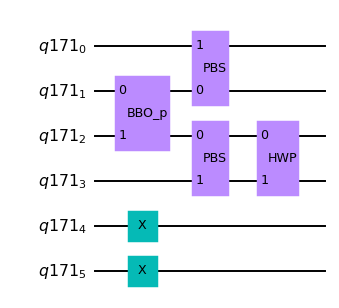

In [15]:
def qc_QCRb_out(th):
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr, name = 'QCR')
    qc_BBO_p_ = qc_BBO_p(th); qc.append(qc_BBO_p_, [qr[1],qr[2]])              # BBO_p
    #qc_QWP_ = qc_QWP(); qc.append(qc_QWP_, [qr[1]])                           # QWP
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[1],qr[0]])                      # PBS_A
    # IMZ
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[2],qr[3]])                      # PBS
    qc_HWP_ = qc_HWP(); qc.append(qc_HWP_, [qr[2],qr[3]])                      # HWP
    qc.x(4); qc.x(5) # Atoms's innitial state
    #qc_AtmInt_ = qc_AtmInt(); qc.append(qc_AtmInt_, [qr[3],qr[4],qr[5]])      # Atoms' interaction
    #qc_M_ = qc_M(); qc.append(qc_M_, [qr[3]])                                 # Mirrors
    #qc_PS_ = qc_PS(ph); qc.append(qc_PS_, [qr[3]])                            # Phase
    #qc_BS_ = qc_BS(); qc.append(qc_BS_, [qr[3]])                              # BS
    return qc
qc_QCRb_out_ = qc_QCRb_out(math.pi); qc_QCRb_out_.draw(output = 'mpl', scale = 0.7)

## Retrieve $b_{out}$ 

In [16]:
f = open("jobs_ids_b_out.txt","r")
list_ids_b_out_ = f.read().replace("'","").replace(" ","").replace("[","").replace("]","").split(",")
f.close()

In [17]:
list_ids_b_out_

['chelpsn7uma4tn78rc2g',
 'chep59kqqnv6prm1uccg',
 'chesmsf9targ2vpmqkig',
 'chf07ob66hmpifuql4jg',
 'chf0fj79targ2vpr406g',
 'chf0jqvppn69h5prdplg',
 'chf0o1nppn69h5pri8a0',
 'chf0s8g4sb77opi8pskg',
 'chf10jmo5i9gdbb1rjsg',
 'chf4t0sp8f687ogloj2g',
 'chf8gc6o5i9gdbbagde0',
 'chfcbncp8f687ogte7s0',
 'chfch9vppn69h5q89pug',
 'chfclgj66hmpifv83nr0',
 'chfcs3kp8f687ogtslfg',
 'chfd0e366hmpifv8cp7g',
 'chfd7c04sb77opiludd0',
 'chfde0f9targ2vq8tna0',
 'chfdkeo4sb77opim9rfg',
 'chfdorj66hmpifv92d4g',
 'chfdsjo4sb77opimh3g0']

In [18]:
print(device)
for j in range(0, d):
    print(list_ids_b_out_[j])
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
    qc_QCRb_out_ = qc_QCRb_out(th[j]); qc.append(qc_QCRb_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
    job_ret_b_out = device.retrieve_job(list_ids_b_out_[j])
    qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
    print(job_ret_b_out.job_id())
    qstf = StateTomographyFitter(job_ret_b_out.result(), qstc)
    #
    # rho
    #
    ret_rhob_AbWZ_out[j] = qstf.fit(method='lstsq')
    ret_rhob_0bWZ_out[j] = projM_np(8, '0', ret_rhob_AbWZ_out[j])
    ret_Phi_b_0bWZ_out[j] = dephasing_map_3qubits_np(ret_rhob_0bWZ_out[j])
    ret_Irr_b_out[j] = entropy(ret_Phi_b_0bWZ_out[j]) - entropy(ret_rhob_0bWZ_out[j])
    print(ret_Irr_b_out[j])
    print('j = {:2d}  - theta = {}'.format(j, th[j]))

ibm_nairobi
chelpsn7uma4tn78rc2g
chelpsn7uma4tn78rc2g
0.03724904333858425
j =  0  - theta = 0.01
chep59kqqnv6prm1uccg
chep59kqqnv6prm1uccg
0.026173457920199206
j =  1  - theta = 0.16657963267948966
chesmsf9targ2vpmqkig
chesmsf9targ2vpmqkig
0.036787517030279826
j =  2  - theta = 0.3231592653589793
chf07ob66hmpifuql4jg
chf07ob66hmpifuql4jg
0.03918968650143695
j =  3  - theta = 0.479738898038469
chf0fj79targ2vpr406g
chf0fj79targ2vpr406g
0.04380441235784438
j =  4  - theta = 0.6363185307179586
chf0jqvppn69h5prdplg
chf0jqvppn69h5prdplg
0.04703039971492984
j =  5  - theta = 0.7928981633974483
chf0o1nppn69h5pri8a0
chf0o1nppn69h5pri8a0
0.05130806727519588
j =  6  - theta = 0.9494777960769379
chf0s8g4sb77opi8pskg
chf0s8g4sb77opi8pskg
0.05182945190347421
j =  7  - theta = 1.1060574287564275
chf10jmo5i9gdbb1rjsg
chf10jmo5i9gdbb1rjsg
0.06509734553319901
j =  8  - theta = 1.2626370614359173
chf4t0sp8f687ogloj2g
chf4t0sp8f687ogloj2g
0.0654033969086747
j =  9  - theta = 1.419216694115407
chf8gc6o5i9g

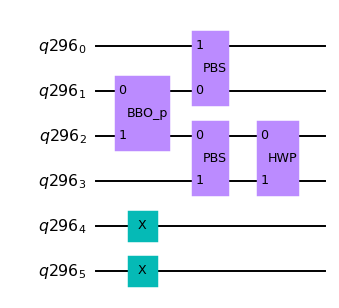

In [19]:
qc.decompose().draw(output = 'mpl', scale = 0.7)

## Simulação $b_{in}$

In [20]:
thmax = math.pi-0.01;   dth = thmax/20; th = np.arange(0.01, thmax+dth, dth); d = th.shape[0]
sim_rhob_AbWZ_in             = np.zeros(th.shape[0], dtype=object)
sim_rhob_AbWZ_out            = np.zeros(th.shape[0], dtype=object)
sim_rhob_0bWZ_in             = np.zeros(th.shape[0], dtype=object)
sim_rhob_0bWZ_out            = np.zeros(th.shape[0], dtype=object)
sim_Phi_b_0bWZ_in            = np.zeros(th.shape[0], dtype=object)
sim_Phi_b_0bWZ_out           = np.zeros(th.shape[0], dtype=object)
sim_Irr_b_in                 = np.zeros(th.shape[0])
sim_Irr_b_out                = np.zeros(th.shape[0])

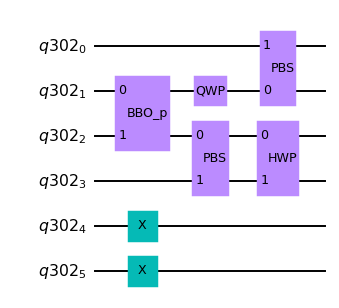

In [21]:
def qc_QCRb_in(th):
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr, name = 'QCR')
    qc_BBO_p_ = qc_BBO_p(th); qc.append(qc_BBO_p_, [qr[1],qr[2]])              # BBO_p
    qc_QWP_ = qc_QWP(); qc.append(qc_QWP_, [qr[1]])                            # QWP
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[1],qr[0]])                      # PBS_A
    # IMZ
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[2],qr[3]])                      # PBS
    qc_HWP_ = qc_HWP(); qc.append(qc_HWP_, [qr[2],qr[3]])                      # HWP
    qc.x(4); qc.x(5)                                                           # Atoms's innitial state
    #qc_AtmInt_ = qc_AtmInt(); qc.append(qc_AtmInt_, [qr[3],qr[4],qr[5]])      # Atoms' interaction
    #qc_M_ = qc_M(); qc.append(qc_M_, [qr[3]])                                 # Mirrors
    #qc_PS_ = qc_PS(ph); qc.append(qc_PS_, [qr[3]])                            # Phase
    #qc_BS_ = qc_BS(); qc.append(qc_BS_, [qr[3]])                              # BS
    return qc
qc_QCRb_in_ = qc_QCRb_in(math.pi); qc_QCRb_in_.draw(output = 'mpl', scale = 0.7)

In [22]:
for j in range(0, d):
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
    #
    # Circuito
    #
    qc_QCRb_in_ = qc_QCRb_in(th[j]); qc.append(qc_QCRb_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
    #
    # Tomography
    #
    qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
    job = qiskit.execute(qstc, backend = simulator, shots=nshots)
    qstf = StateTomographyFitter(job.result(), qstc)
    #
    # rho
    #
    sim_rhob_AbWZ_in[j] = qstf.fit(method='lstsq')
    sim_rhob_0bWZ_in[j] = projM_np(8, '0', sim_rhob_AbWZ_in[j])
    sim_Phi_b_0bWZ_in[j] = dephasing_map_3qubits_np(sim_rhob_0bWZ_in[j])
    sim_Irr_b_in[j] = entropy(sim_Phi_b_0bWZ_in[j]) - entropy(sim_rhob_0bWZ_in[j])
    print(sim_Irr_b_in[j])
    print('j = {:2d}  - theta = {}'.format(j, th[j]))

0.005264234323913819
j =  0  - theta = 0.01
0.05634861579580002
j =  1  - theta = 0.16657963267948966
0.1726889295490434
j =  2  - theta = 0.3231592653589793
0.3048740319976753
j =  3  - theta = 0.479738898038469
0.44916412557363994
j =  4  - theta = 0.6363185307179586
0.6020992241181927
j =  5  - theta = 0.7928981633974483
0.7250359496165919
j =  6  - theta = 0.9494777960769379
0.8295754541069198
j =  7  - theta = 1.1060574287564275
0.910429261760919
j =  8  - theta = 1.2626370614359173
0.9604984649399326
j =  9  - theta = 1.419216694115407
0.9821617552330231
j = 10  - theta = 1.5757963267948967
0.9598682219112533
j = 11  - theta = 1.7323759594743862
0.9132810445703888
j = 12  - theta = 1.8889555921538759
0.8188628935960088
j = 13  - theta = 2.0455352248333654
0.7184409628642263
j = 14  - theta = 2.202114857512855
0.5837527084185348
j = 15  - theta = 2.358694490192345
0.45245890119290205
j = 16  - theta = 2.5152741228718343
0.2850727001922691
j = 17  - theta = 2.6718537555513238
0.163

## Simulação $b_{out}$

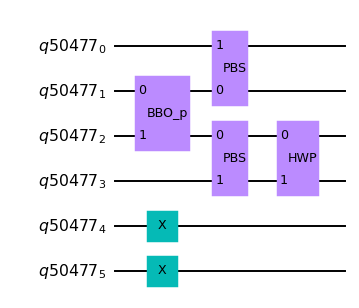

In [23]:
def qc_QCRb_out(th):
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr, name = 'QCR')
    qc_BBO_p_ = qc_BBO_p(th); qc.append(qc_BBO_p_, [qr[1],qr[2]])              # BBO_p
    #qc_QWP_ = qc_QWP(); qc.append(qc_QWP_, [qr[1]])                           # QWP
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[1],qr[0]])                      # PBS_A
    # IMZ
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[2],qr[3]])                      # PBS
    qc_HWP_ = qc_HWP(); qc.append(qc_HWP_, [qr[2],qr[3]])                      # HWP
    qc.x(4); qc.x(5) # Atoms's innitial state
    #qc_AtmInt_ = qc_AtmInt(); qc.append(qc_AtmInt_, [qr[3],qr[4],qr[5]])      # Atoms' interaction
    #qc_M_ = qc_M(); qc.append(qc_M_, [qr[3]])                                 # Mirrors
    #qc_PS_ = qc_PS(ph); qc.append(qc_PS_, [qr[3]])                            # Phase
    #qc_BS_ = qc_BS(); qc.append(qc_BS_, [qr[3]])                              # BS
    return qc
qc_QCRb_out_ = qc_QCRb_out(math.pi); qc_QCRb_out_.draw(output = 'mpl', scale = 0.7)

In [24]:
for j in range(0, d):
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
    #
    # Circuito
    #
    qc_QCRb_out_ = qc_QCRb_out(th[j]); qc.append(qc_QCRb_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
    #
    # Tomography
    #
    qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
    job = qiskit.execute(qstc, backend = simulator, shots=nshots)
    qstf = StateTomographyFitter(job.result(), qstc)
    #
    # rho
    #
    sim_rhob_AbWZ_out[j] = qstf.fit(method='lstsq')
    sim_rhob_0bWZ_out[j] = projM_np(8, '0', sim_rhob_AbWZ_out[j])
    sim_Phi_b_0bWZ_out[j] = dephasing_map_3qubits_np(sim_rhob_0bWZ_out[j])
    sim_Irr_b_out[j] = entropy(sim_Phi_b_0bWZ_out[j]) - entropy(sim_rhob_0bWZ_out[j])
    print(sim_Irr_b_out[j])
    print('j = {:2d}  - theta = {}'.format(j, th[j]))

0.0023081622939205744
j =  0  - theta = 0.01
0.0035263449398620014
j =  1  - theta = 0.16657963267948966
0.0023906771833181184
j =  2  - theta = 0.3231592653589793
0.0026835308924652163
j =  3  - theta = 0.479738898038469
0.004329138169188021
j =  4  - theta = 0.6363185307179586
0.0031492742501833537
j =  5  - theta = 0.7928981633974483
0.004724317672540668
j =  6  - theta = 0.9494777960769379
0.00412588660125162
j =  7  - theta = 1.1060574287564275
0.004211251161326993
j =  8  - theta = 1.2626370614359173
0.0051451598683135286
j =  9  - theta = 1.419216694115407
0.0050002547425398725
j = 10  - theta = 1.5757963267948967
0.007818071976020524
j = 11  - theta = 1.7323759594743862
0.006738217208525882
j = 12  - theta = 1.8889555921538759
0.008519894578902787
j = 13  - theta = 2.0455352248333654
0.01110437812547753
j = 14  - theta = 2.202114857512855
0.013893461571279075
j = 15  - theta = 2.358694490192345
0.01928820365405559
j = 16  - theta = 2.5152741228718343
0.014101775731548805
j = 17

## Resultados teóricos

In [25]:
thmax = math.pi-0.01;   dth = thmax/20; th = np.arange(0.01, thmax+dth, dth); d = th.shape[0]
the_Irr_b_in                 = np.zeros(th.shape[0])
the_Irr_b_out                = np.zeros(th.shape[0])

In [26]:
for j in range(0,d):
    c_plus = np.cos(th[j]/2)
    c_minus = np.sqrt(1 - c_plus**2)
    the_Irr_b_in[j] = -1.0 * c_plus**2 * np.log2(1.0 * c_plus**2) - c_minus**2 * np.log2(c_minus**2)
    the_Irr_b_out[j] = 0
    print(the_Irr_b_in[j])

0.00041825654974191235
0.05960827160488702
0.1732975820045815
0.3131570775169316
0.4621607944535125
0.607604014273341
0.7394634336049204
0.849811316538504
0.932583510389106
0.9834895100553851
0.9999819663871292
0.9812490235560026
0.9282133180193721
0.8435331680632676
0.7316110586657141
0.5986265342290418
0.45263200118252755
0.30379873295430637
0.1650395819160478
0.05377438056525288
4.038739397709968e-31


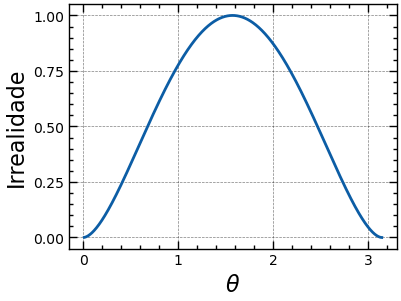

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def func(theta):
    c_plus = np.cos(theta/2)
    c_minus = np.sqrt(1 - c_plus**2)
    return -1.0 * c_plus**2 * np.log2(1.0 * c_plus**2) - c_minus**2 * np.log2(c_minus**2)

theta_vals = np.linspace(0.01, np.pi, 1000)
y_vals = func(theta_vals)

plt.figure(figsize = (4,3), constrained_layout = True)
plt.style.use(['science', 'notebook', 'grid'])
plt.plot(theta_vals, y_vals)
plt.xlabel(r'$\theta$')
plt.ylabel('Irrealidade')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.title('Gráfico da função')
plt.show()


#### Gráficos

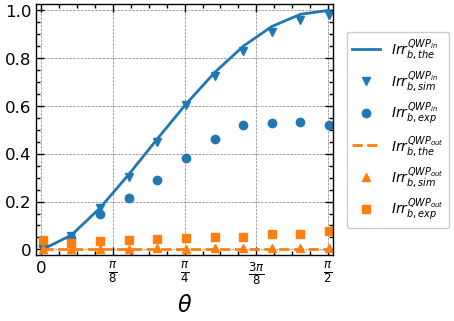

In [28]:
import string
plt.figure(figsize = (7.5, 3.2), constrained_layout = True)
#plt.subplots(figsize=(6.5, 3.2))
font = {'family': 'Verdana', 'color':  'black', 'size': 20}
#
plt.style.use(['science', 'notebook', 'grid'])
ax0 = plt.subplot(121)
plt.gca().set_xlim([-0.01,3.14])
plt.gca().set_ylim([-0.01,0.52])
#
# simulation
#
plt.plot(th[:len(th)//2+1], the_Irr_b_in[:len(th)//2+1], '-' ,
         color='#1f77b4', label = r'$Irr_{b, the}^{QWP_{in}}$')
plt.plot(th[:len(th)//2+1], sim_Irr_b_in[:len(th)//2+1], 'v' ,
         color='#1f77b4', label = r'$Irr_{b, sim}^{QWP_{in}}$')
plt.plot(th[:len(th)//2+1], ret_Irr_b_in[:len(th)//2+1], 'o' ,
         color='#1f77b4', label = r'$Irr_{b, exp}^{QWP_{in}}$')
plt.plot(th[:len(th)//2+1], the_Irr_b_out[:len(th)//2+1], '--',
         color='#ff7f0e', label = r'$Irr_{b,the}^{QWP_{out}}$')
plt.plot(th[:len(th)//2+1], sim_Irr_b_out[:len(th)//2+1], '^',
         color='#ff7f0e', label = r'$Irr_{b,sim}^{QWP_{out}}$')
plt.plot(th[:len(th)//2+1], ret_Irr_b_out[:len(th)//2+1], 's',
         color='#ff7f0e', label = r'$Irr_{b,exp}^{QWP_{out}}$')
#
#
plt.legend(bbox_to_anchor=(1.22, 0.5), loc='center',
           borderaxespad=0, fontsize=10)
#, frameon=False, handlelength=1.5
plt.xlabel(r'$\theta$')
tick_posx= [0, np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2]
#, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4, 2*np.pi]
labelsx = ['0', r'$\frac{\pi}{8}$', r'$\frac{\pi}{4}$',
           r'$\frac{3\pi}{8}$', r'$\frac{\pi}{2}$']
#, r'$\frac{3\pi}{4}$', r'$\pi$', r'$\frac{5\pi}{4}$'
#, r'$\frac{3\pi}{2}$', r'$\frac{7\pi}{4}$', r'$2\pi$']
tick_posy= [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labelsy = ['0', '0.2', '0.4', '0.6', '0.8', '1.0']
#tick_posx= [0, 5]
#labelsx = ['0', '5']
plt.xlim([-0.025, np.pi/2+0.025])
plt.ylim([-0.025, 1.025])
plt.xticks(tick_posx, labelsx)
plt.yticks(tick_posy, labelsy)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.tick_params('y', labelleft=False)
#ax1.text(-0.1, 1.1, string.ascii_uppercase[1], transform=ax1.transAxes, 
#            size=20, weight='bold')
#
#plt.tight_layout()
#plt.savefig('zgraph_CCR_vpv=0_sim.pdf', format='pdf', dpi = 1200, bbox_inches='tight')
plt.show()

## Mitigação $b_{in}$

In [29]:
from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter

### Retrieve do job da mitigação

In [30]:
thmax = math.pi-0.01;   dth = thmax/20; th = np.arange(0.01, thmax+dth, dth); d = th.shape[0]
mit_rhob_AbWZ_in             = np.zeros(th.shape[0], dtype=object)
mit_rhob_AbWZ_out            = np.zeros(th.shape[0], dtype=object)
mit_rhob_0bWZ_in             = np.zeros(th.shape[0], dtype=object)
mit_rhob_0bWZ_out            = np.zeros(th.shape[0], dtype=object)
mit_Phi_b_0bWZ_in            = np.zeros(th.shape[0], dtype=object)
mit_Phi_b_0bWZ_out           = np.zeros(th.shape[0], dtype=object)
mit_Irr_b_in                 = np.zeros(th.shape[0])
mit_Irr_b_out                = np.zeros(th.shape[0])

In [31]:
print(device)
qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
qubit_list = [1,3,4,5] # os qubits para os quais aplicaremos calibracao de medidas
meas_calibs, state_labels = complete_meas_cal(qubit_list = qubit_list, qr = qr)
job_ret_b_in = device.retrieve_job('chdn6tim9ctescqge6gg')
print(job_ret_b_in.job_id())
job_monitor(job_ret_b_in)
meas_fitter = CompleteMeasFitter(job_ret_b_in.result(), state_labels)

ibm_nairobi
chdn6tim9ctescqge6gg
Job Status: job has successfully run


In [32]:
print(device)
for j in range(0, d):
    print(list_ids_b_in_[j])
    job_ret_b_in = device.retrieve_job(list_ids_b_in_[j])
    mitigated_results_b_in = meas_fitter.filter.apply(job_ret_b_in.result())
    qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]]) # circuit for state tomography
    qstf_mit_b_in = StateTomographyFitter(mitigated_results_b_in, qstc)
    print(job_ret_b_in.job_id())
    #
    # rho
    #
    mit_rhob_AbWZ_in[j] = qstf_mit_b_in.fit(method='lstsq')
    #
    mit_rhob_0bWZ_in[j] = projM_np(8, '0', mit_rhob_AbWZ_in[j])
    mit_Phi_b_0bWZ_in[j] = dephasing_map_3qubits_np(mit_rhob_0bWZ_in[j])
    mit_Irr_b_in[j] = entropy(mit_Phi_b_0bWZ_in[j]) - entropy(mit_rhob_0bWZ_in[j])
    print(mit_Irr_b_in[j])
    print('j = {:2d}  - theta = {}'.format(j, th[j]))

ibm_nairobi
chb0nc0dickn60j1i23g
chb0nc0dickn60j1i23g
0.01673004988609167
j =  0  - theta = 0.01
chb1fl5v6mngo8m6h6l0
chb1fl5v6mngo8m6h6l0
0.053907214457573016
j =  1  - theta = 0.16657963267948966
chb5628fdairicmktu60
chb5628fdairicmktu60
0.19546080537602684
j =  2  - theta = 0.3231592653589793
chb8u1pmfb1ddb4vccb0
chb8u1pmfb1ddb4vccb0
0.28512048988905997
j =  3  - theta = 0.479738898038469
chbckvoo51arsodcbrbg
chbckvoo51arsodcbrbg
0.38436440383469894
j =  4  - theta = 0.6363185307179586
chbfp70o51arsode4alg
chbfp70o51arsode4alg
0.5081509599072362
j =  5  - theta = 0.7928981633974483
chbgbilv6mngo8mib9p0
chbgbilv6mngo8mib9p0
0.6191500581972635
j =  6  - theta = 0.9494777960769379
chbhv5lv6mngo8mjavhg
chbhv5lv6mngo8mjavhg
0.7238732808112646
j =  7  - theta = 1.1060574287564275
chbk249mfb1ddb55e200
chbk249mfb1ddb55e200
0.7218384950651395
j =  8  - theta = 1.2626370614359173
chbnos44cg5fl02loklg
chbnos44cg5fl02loklg
0.7721988506240768
j =  9  - theta = 1.419216694115407
chbosipmfb1ddb58s

## Mitigação $b_{out}$

In [33]:
print(device)
for j in range(0, d):
    print(list_ids_b_out_[j])
    job_ret_b_out = device.retrieve_job(list_ids_b_out_[j])
    mitigated_results_b_out = meas_fitter.filter.apply(job_ret_b_out.result())
    qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]]) # circuit for state tomography
    qstf_mit_b_out = StateTomographyFitter(mitigated_results_b_out, qstc)
    print(job_ret_b_out.job_id())
    #
    # rho
    #
    mit_rhob_AbWZ_out[j] = qstf_mit_b_out.fit(method='lstsq')
    #
    mit_rhob_0bWZ_out[j] = projM_np(8, '0', mit_rhob_AbWZ_out[j])
    mit_Phi_b_0bWZ_out[j] = dephasing_map_3qubits_np(mit_rhob_0bWZ_out[j])
    mit_Irr_b_out[j] = entropy(mit_Phi_b_0bWZ_out[j]) - entropy(mit_rhob_0bWZ_out[j])
    print(mit_Irr_b_out[j])
    print('j = {:2d}  - theta = {}'.format(j, th[j]))

ibm_nairobi
chelpsn7uma4tn78rc2g
chelpsn7uma4tn78rc2g
0.03526333642686927
j =  0  - theta = 0.01
chep59kqqnv6prm1uccg
chep59kqqnv6prm1uccg
0.02683157739086245
j =  1  - theta = 0.16657963267948966
chesmsf9targ2vpmqkig
chesmsf9targ2vpmqkig
0.043816624857131364
j =  2  - theta = 0.3231592653589793
chf07ob66hmpifuql4jg
chf07ob66hmpifuql4jg
0.04378616606860586
j =  3  - theta = 0.479738898038469
chf0fj79targ2vpr406g
chf0fj79targ2vpr406g
0.05091807534955395
j =  4  - theta = 0.6363185307179586
chf0jqvppn69h5prdplg
chf0jqvppn69h5prdplg
0.05482854384643704
j =  5  - theta = 0.7928981633974483
chf0o1nppn69h5pri8a0
chf0o1nppn69h5pri8a0
0.06272818133184835
j =  6  - theta = 0.9494777960769379
chf0s8g4sb77opi8pskg
chf0s8g4sb77opi8pskg
0.06272546662137046
j =  7  - theta = 1.1060574287564275
chf10jmo5i9gdbb1rjsg
chf10jmo5i9gdbb1rjsg
0.08289314976086035
j =  8  - theta = 1.2626370614359173
chf4t0sp8f687ogloj2g
chf4t0sp8f687ogloj2g
0.09115604632876398
j =  9  - theta = 1.419216694115407
chf8gc6o5i9g

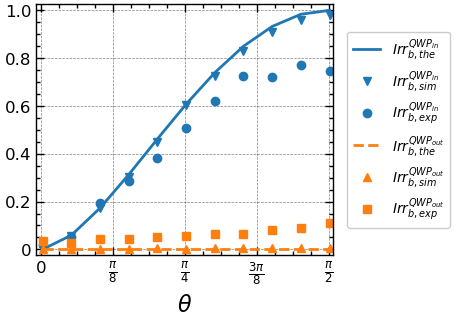

In [34]:
import string
plt.figure(figsize = (7.5, 3.2), constrained_layout = True)
#plt.subplots(figsize=(6.5, 3.2))
font = {'family': 'Verdana', 'color':  'black', 'size': 20}
#
plt.style.use(['science', 'notebook', 'grid'])
ax0 = plt.subplot(121)
plt.gca().set_xlim([-0.01,3.14])
plt.gca().set_ylim([-0.01,0.52])
#
# simulation
#
plt.plot(th[:len(th)//2+1], the_Irr_b_in[:len(th)//2+1], '-' ,
         color='#1f77b4', label = r'$Irr_{b, the}^{QWP_{in}}$')
plt.plot(th[:len(th)//2+1], sim_Irr_b_in[:len(th)//2+1], 'v' ,
         color='#1f77b4', label = r'$Irr_{b, sim}^{QWP_{in}}$')
plt.plot(th[:len(th)//2+1], mit_Irr_b_in[:len(th)//2+1], 'o' ,
         color='#1f77b4', label = r'$Irr_{b, exp}^{QWP_{in}}$')
plt.plot(th[:len(th)//2+1], the_Irr_b_out[:len(th)//2+1], '--',
         color='#ff7f0e', label = r'$Irr_{b,the}^{QWP_{out}}$')
plt.plot(th[:len(th)//2+1], sim_Irr_b_out[:len(th)//2+1], '^',
         color='#ff7f0e', label = r'$Irr_{b,sim}^{QWP_{out}}$')
plt.plot(th[:len(th)//2+1], mit_Irr_b_out[:len(th)//2+1], 's',
         color='#ff7f0e', label = r'$Irr_{b,exp}^{QWP_{out}}$')
#
#
plt.legend(bbox_to_anchor=(1.22, 0.5), loc='center',
           borderaxespad=0, fontsize=10)
#, frameon=False, handlelength=1.5
plt.xlabel(r'$\theta$')
tick_posx= [0, np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2]
#, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4, 2*np.pi]
labelsx = ['0', r'$\frac{\pi}{8}$', r'$\frac{\pi}{4}$',
           r'$\frac{3\pi}{8}$', r'$\frac{\pi}{2}$']
#, r'$\frac{3\pi}{4}$', r'$\pi$', r'$\frac{5\pi}{4}$'
#, r'$\frac{3\pi}{2}$', r'$\frac{7\pi}{4}$', r'$2\pi$']
tick_posy= [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labelsy = ['0', '0.2', '0.4', '0.6', '0.8', '1.0']
#tick_posx= [0, 5]
#labelsx = ['0', '5']
plt.xlim([-0.025, np.pi/2+0.025])
plt.ylim([-0.025, 1.025])
plt.xticks(tick_posx, labelsx)
plt.yticks(tick_posy, labelsy)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.tick_params('y', labelleft=False)
#ax1.text(-0.1, 1.1, string.ascii_uppercase[1], transform=ax1.transAxes, 
#            size=20, weight='bold')
#
#plt.tight_layout()
plt.savefig('zgraph_b.pdf', format='pdf', dpi = 1200, bbox_inches='tight')
plt.show()

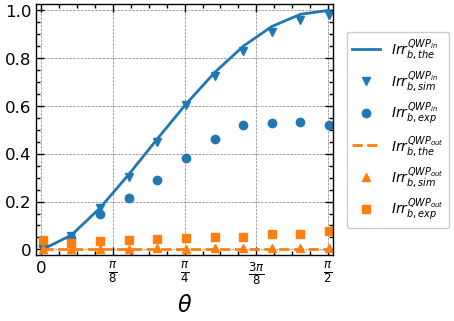

# Irrealidade dos átomos fora do IMZ

## BBO$_{p}$ - QWP$_{in}$

<img src = 'setup_realism.jpg' width = '90%'>

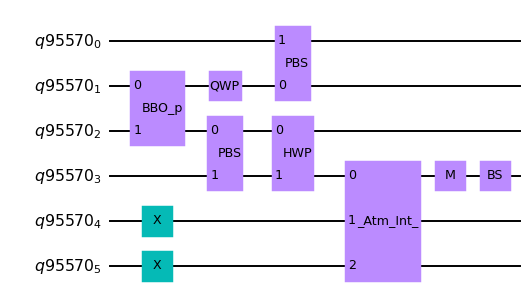

In [35]:
def qc_QCRWZ_in(th):
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr, name = 'QCR')
    qc_BBO_p_ = qc_BBO_p(th); qc.append(qc_BBO_p_, [qr[1],qr[2]])             # BBO_p
    qc_QWP_ = qc_QWP(); qc.append(qc_QWP_, [qr[1]])                           # QWP
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[1],qr[0]])                     # PBS_A
    # IMZ
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[2],qr[3]])                     # PBS
    qc_HWP_ = qc_HWP(); qc.append(qc_HWP_, [qr[2],qr[3]])                     # HWP
    qc.x(4); qc.x(5)                                                          # Atoms's initial state
    qc_AtmInt_ = qc_AtmInt(); qc.append(qc_AtmInt_, [qr[3],qr[4],qr[5]])      # Atoms' interaction
    qc_M_ = qc_M(); qc.append(qc_M_, [qr[3]])                                 # Mirrors
    #qc_PS_ = qc_PS(ph); qc.append(qc_PS_, [qr[3]])                           # Phase
    qc_BS_ = qc_BS(); qc.append(qc_BS_, [qr[3]])                              # BS
    return qc
qc_QCRWZ_in_ = qc_QCRWZ_in(math.pi); qc_QCRWZ_in_.draw(output = 'mpl', scale = 0.7)

### Retrieve

In [113]:
jobs_ids_WZ_in

['chflp5g4sb77opise4h0',
 'chfmupf9targ2vqg4ovg',
 'chfn93vppn69h5qgh9bg',
 'chfq84nppn69h5qidi8g',
 'chfu8ar66hmpifvk570g',
 'chg26i84sb77opj32t40',
 'chg4bpj66hmpifvmr7cg',
 'chg4vseo5i9gdbbtoivg',
 'chn7f8cnsmp20v4ndlsg',
 'chg9h2vppn69h5qps3r0',
 'chg9vh04sb77opj7690g',
 'chga4deo5i9gdbc0mbg0',
 'chgaab7ppn69h5qqcmcg',
 'chgafor66hmpifvq95t0',
 'chgak7g4sb77opj7jo0g',
 'chgaqmf9targ2vqqk010',
 'chgb26g4sb77opj7sjjg',
 'chgb6c4p8f687ohg1q3g',
 'chgbb9j66hmpifvqqjdg',
 'chgdhefppn69h5qsdej0',
 'chgfdug4sb77opjalt90']

In [114]:
f = open("jobs_ids_WZ_in.txt", "w")
f.write(str(jobs_ids_WZ_in))
f.close()

In [115]:
f = open("jobs_ids_WZ_in.txt","r")
list_ids_WZ_in_ = f.read().replace("'","").replace(" ","").replace("[","").replace("]","").split(",")
f.close()

In [116]:
list_ids_WZ_in_, len(list_ids_WZ_in_)

(['chflp5g4sb77opise4h0',
  'chfmupf9targ2vqg4ovg',
  'chfn93vppn69h5qgh9bg',
  'chfq84nppn69h5qidi8g',
  'chfu8ar66hmpifvk570g',
  'chg26i84sb77opj32t40',
  'chg4bpj66hmpifvmr7cg',
  'chg4vseo5i9gdbbtoivg',
  'chn7f8cnsmp20v4ndlsg',
  'chg9h2vppn69h5qps3r0',
  'chg9vh04sb77opj7690g',
  'chga4deo5i9gdbc0mbg0',
  'chgaab7ppn69h5qqcmcg',
  'chgafor66hmpifvq95t0',
  'chgak7g4sb77opj7jo0g',
  'chgaqmf9targ2vqqk010',
  'chgb26g4sb77opj7sjjg',
  'chgb6c4p8f687ohg1q3g',
  'chgbb9j66hmpifvqqjdg',
  'chgdhefppn69h5qsdej0',
  'chgfdug4sb77opjalt90'],
 21)

In [86]:
thmax = math.pi;   dth = thmax/20; th = np.arange(0, thmax+dth, dth); d = th.shape[0]
ret_rhoWZ_AbWZ_in            = np.zeros(th.shape[0], dtype=object)
ret_rhoWZ_AbWZ_out           = np.zeros(th.shape[0], dtype=object)
ret_rhoWZ_00WZ_in            = np.zeros(th.shape[0], dtype=object)
ret_rhoWZ_00WZ_out           = np.zeros(th.shape[0], dtype=object)
ret_Phi_WZ_00WZ_in           = np.zeros(th.shape[0], dtype=object)
ret_Phi_WZ_00WZ_out          = np.zeros(th.shape[0], dtype=object)
ret_Irr_WZ_in                = np.zeros(th.shape[0])
ret_Irr_WZ_out               = np.zeros(th.shape[0])
jobs_ids_WZ_in = []; jobs_ids_WZ_out = []

In [109]:
print(device)
for j in range(0, d):
    print(list_ids_WZ_in_[j])
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
    qc_QCRWZ_in_ = qc_QCRWZ_in(th[j]); qc.append(qc_QCRWZ_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
    job_ret_WZ_in = device.retrieve_job(list_ids_WZ_in_[j])
    qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
    print(job_ret_WZ_in.job_id())
    qstf = StateTomographyFitter(job_ret_WZ_in.result(), qstc)
    #
    # rho
    #
    ret_rhoWZ_AbWZ_in[j] = qstf.fit(method='lstsq')
    ret_rhoWZ_00WZ_in[j] = projM_np(4, '00', ret_rhoWZ_AbWZ_in[j])
    ret_Phi_WZ_00WZ_in[j] = dephasing_map_2qubits_np(ret_rhoWZ_00WZ_in[j])
    ret_Irr_WZ_in[j] = entropy(ret_Phi_WZ_00WZ_in[j]) - entropy(ret_rhoWZ_00WZ_in[j])
    print(ret_Irr_WZ_in[j])
    print('j = {:2d}  - theta = {}'.format(j, th[j]))

ibm_nairobi
chflp5g4sb77opise4h0
chflp5g4sb77opise4h0
0.024420550505978245
j =  0  - theta = 0.01
chfmupf9targ2vqg4ovg
chfmupf9targ2vqg4ovg
0.05733418121856726
j =  1  - theta = 0.16657963267948966
chfn93vppn69h5qgh9bg
chfn93vppn69h5qgh9bg
0.1333744000036895
j =  2  - theta = 0.3231592653589793
chfq84nppn69h5qidi8g
chfq84nppn69h5qidi8g
0.21022785866895555
j =  3  - theta = 0.479738898038469
chfu8ar66hmpifvk570g
chfu8ar66hmpifvk570g
0.2841335172323498
j =  4  - theta = 0.6363185307179586
chg26i84sb77opj32t40
chg26i84sb77opj32t40
0.36763341335472643
j =  5  - theta = 0.7928981633974483
chg4bpj66hmpifvmr7cg
chg4bpj66hmpifvmr7cg
0.4227482538229752
j =  6  - theta = 0.9494777960769379
chg4vseo5i9gdbbtoivg
chg4vseo5i9gdbbtoivg
0.4307531447131727
j =  7  - theta = 1.1060574287564275
chn7f8cnsmp20v4ndlsg
chn7f8cnsmp20v4ndlsg
0.42036940781889176
j =  8  - theta = 1.2626370614359173
chg9h2vppn69h5qps3r0
chg9h2vppn69h5qps3r0
0.4856804857055659
j =  9  - theta = 1.419216694115407
chg9vh04sb77opj76

### Simulation $WZ_{in}$

In [65]:
thmax = math.pi;   dth = thmax/20; th = np.arange(0, thmax+dth, dth); d = th.shape[0]
sim_rhoWZ_AbWZ_in            = np.zeros(th.shape[0], dtype=object)
sim_rhoWZ_AbWZ_out           = np.zeros(th.shape[0], dtype=object)
sim_rhoWZ_00WZ_in            = np.zeros(th.shape[0], dtype=object)
sim_rhoWZ_00WZ_out           = np.zeros(th.shape[0], dtype=object)
sim_Phi_WZ_00WZ_in           = np.zeros(th.shape[0], dtype=object)
sim_Phi_WZ_00WZ_out          = np.zeros(th.shape[0], dtype=object)
sim_Irr_WZ_in                = np.zeros(th.shape[0])
sim_Irr_WZ_out               = np.zeros(th.shape[0])

<img src = 'setup_realism.jpg' width = '90%'>

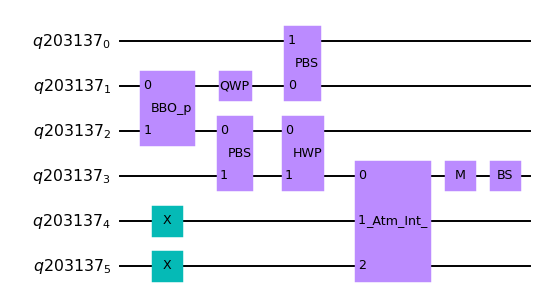

In [66]:
def qc_QCRWZ_in(th):
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr, name = 'QCR')
    qc_BBO_p_ = qc_BBO_p(th); qc.append(qc_BBO_p_, [qr[1],qr[2]])             # BBO_p
    qc_QWP_ = qc_QWP(); qc.append(qc_QWP_, [qr[1]])                           # QWP
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[1],qr[0]])                     # PBS_A
    # IMZ
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[2],qr[3]])                     # PBS
    qc_HWP_ = qc_HWP(); qc.append(qc_HWP_, [qr[2],qr[3]])                     # HWP
    qc.x(4); qc.x(5)                                                          # Atoms's initial state
    qc_AtmInt_ = qc_AtmInt(); qc.append(qc_AtmInt_, [qr[3],qr[4],qr[5]])      # Atoms' interaction
    qc_M_ = qc_M(); qc.append(qc_M_, [qr[3]])                                 # Mirrors
    #qc_PS_ = qc_PS(ph); qc.append(qc_PS_, [qr[3]])                           # Phase
    qc_BS_ = qc_BS(); qc.append(qc_BS_, [qr[3]])                              # BS
    return qc
qc_QCRWZ_in_ = qc_QCRWZ_in(math.pi); qc_QCRWZ_in_.draw(output = 'mpl', scale = 0.7)

In [67]:
for j in range(0,d):
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
    #
    # Circuit
    #
    qc_QCRWZ_in_ = qc_QCRWZ_in(th[j]); qc.append(qc_QCRWZ_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
    #
    # Tomography
    #
    qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
    job = qiskit.execute(qstc, backend = simulator, shots=nshots)
    jobs_ids_WZ_in.append(job.job_id())
    qstf = StateTomographyFitter(job.result(), qstc)
    #
    # rho
    #
    sim_rhoWZ_AbWZ_in[j] = qstf.fit(method='lstsq')
    sim_rhoWZ_00WZ_in[j] = projM_np(4, '00', sim_rhoWZ_AbWZ_in[j])
    sim_Phi_WZ_00WZ_in[j] = dephasing_map_2qubits_np(sim_rhoWZ_00WZ_in[j])
    sim_Irr_WZ_in[j] = entropy(sim_Phi_WZ_00WZ_in[j]) - entropy(sim_rhoWZ_00WZ_in[j])
    print(sim_Irr_WZ_in[j])
    print('j = {:2d}  - theta = {}'.format(j, th[j]))

0.0028362631816481257
j =  0  - theta = 0.0
0.05067595006112145
j =  1  - theta = 0.15707963267948966
0.16289174793077477
j =  2  - theta = 0.3141592653589793
0.29967375631309484
j =  3  - theta = 0.47123889803846897
0.4530711250401642
j =  4  - theta = 0.6283185307179586
0.5942448795133896
j =  5  - theta = 0.7853981633974483
0.7009357684476148
j =  6  - theta = 0.9424777960769379
0.8185152882493545
j =  7  - theta = 1.0995574287564276
0.9144997765993178
j =  8  - theta = 1.2566370614359172
0.9489081267077217
j =  9  - theta = 1.413716694115407
0.9569626202877625
j = 10  - theta = 1.5707963267948966
0.9566102705883036
j = 11  - theta = 1.7278759594743862
0.909691647118749
j = 12  - theta = 1.8849555921538759
0.8251020180594877
j = 13  - theta = 2.0420352248333655
0.7121268880999801
j = 14  - theta = 2.199114857512855
0.5951057142152428
j = 15  - theta = 2.356194490192345
0.43502920866783007
j = 16  - theta = 2.5132741228718345
0.2823086410465644
j = 17  - theta = 2.670353755551324
0.1

## BBO$_{p}$ - QWP$_{out}$

<img src = 'setup_realism.jpg' width = '90%'>

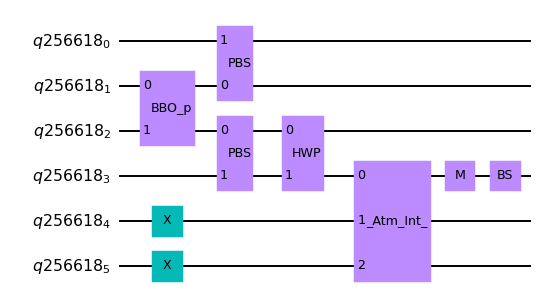

In [68]:
def qc_QCRWZ_out(th):
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr, name = 'QCR')
    qc_BBO_p_ = qc_BBO_p(th); qc.append(qc_BBO_p_, [qr[1],qr[2]])             # BBO_p
    #qc_QWP_ = qc_QWP(); qc.append(qc_QWP_, [qr[1]])                          # QWP
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[1],qr[0]])                     # PBS_A
    # IMZ
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[2],qr[3]])                     # PBS
    qc_HWP_ = qc_HWP(); qc.append(qc_HWP_, [qr[2],qr[3]])                     # HWP
    qc.x(4); qc.x(5)                                                          # Atoms's initial state
    qc_AtmInt_ = qc_AtmInt(); qc.append(qc_AtmInt_, [qr[3],qr[4],qr[5]])      # Atoms' interaction
    qc_M_ = qc_M(); qc.append(qc_M_, [qr[3]])                                 # Mirrors
    #qc_PS_ = qc_PS(ph); qc.append(qc_PS_, [qr[3]])                           # Phase
    qc_BS_ = qc_BS(); qc.append(qc_BS_, [qr[3]])                              # BS
    return qc
qc_QCRWZ_out_ = qc_QCRWZ_out(math.pi); qc_QCRWZ_out_.draw(output = 'mpl', scale = 0.7)

### Retrieve

In [92]:
f = open("jobs_ids_WZ_out.txt","r")
list_ids_WZ_out_ = f.read().replace("'","").replace(" ","").replace("[","").replace("]","").split(",")
f.close()

In [93]:
list_ids_WZ_out_, len(list_ids_WZ_out_)

(['chgnhbfppn69h5r1qlkg',
  'chgumofppn69h5r5idhg',
  'chhcchnppn69h5rfrs60',
  'chhrl12ae4cj9g89p1g0',
  'chhsgk46f7i49rudfnf0',
  'chhsiviae4cj9g8b6ls0',
  'chhst86pqnphtdr8mgm0',
  'chhsvdepqnphtdr8psa0',
  'chht2746f7i49rueb0i0',
  'chht4bc6f7i49ruee6o0',
  'chhtafj7ca17j320kbe0',
  'chhtr4upqnphtdra5t70',
  'chhtt7mpqnphtdra9770',
  'chhuie6pqnphtdrbcig0',
  'chhut52ae4cj9g8es5m0',
  'chhv4epike34bjm9vc1g',
  'chhvht6pqnphtdrd1un0',
  'chibquqae4cj9g8vdkhg',
  'chicjdc6f7i49rv352qg',
  'chicn0k6f7i49rv38pp0',
  'chicqmc6f7i49rv3cip0'],
 21)

In [94]:
print(device)
for j in range(0, d):
    print(list_ids_WZ_out_[j])
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
    qc_QCRWZ_out_ = qc_QCRWZ_out(th[j]); qc.append(qc_QCRWZ_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
    job_ret_WZ_out = device.retrieve_job(list_ids_WZ_out_[j])
    qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
    print(job_ret_WZ_out.job_id())
    qstf = StateTomographyFitter(job_ret_WZ_out.result(), qstc)
    #
    # rho
    #
    ret_rhoWZ_AbWZ_out[j] = qstf.fit(method='lstsq')
    ret_rhoWZ_00WZ_out[j] = projM_np(4, '00', ret_rhoWZ_AbWZ_out[j])
    ret_Phi_WZ_00WZ_out[j] = dephasing_map_2qubits_np(ret_rhoWZ_00WZ_out[j])
    ret_Irr_WZ_out[j] = entropy(ret_Phi_WZ_00WZ_out[j]) - entropy(ret_rhoWZ_00WZ_out[j])
    print(ret_Irr_WZ_out[j])
    print('j = {:2d}  - theta = {}'.format(j, th[j]))

ibm_nairobi
chgnhbfppn69h5r1qlkg
chgnhbfppn69h5r1qlkg
0.01948159624241863
j =  0  - theta = 0.01
chgumofppn69h5r5idhg
chgumofppn69h5r5idhg
0.020671786785510737
j =  1  - theta = 0.16657963267948966
chhcchnppn69h5rfrs60
chhcchnppn69h5rfrs60
0.05599711023869869
j =  2  - theta = 0.3231592653589793
chhrl12ae4cj9g89p1g0
chhrl12ae4cj9g89p1g0
0.03541809460564793
j =  3  - theta = 0.479738898038469
chhsgk46f7i49rudfnf0
chhsgk46f7i49rudfnf0
0.05042617687790507
j =  4  - theta = 0.6363185307179586
chhsiviae4cj9g8b6ls0
chhsiviae4cj9g8b6ls0
0.046583070594177545
j =  5  - theta = 0.7928981633974483
chhst86pqnphtdr8mgm0
chhst86pqnphtdr8mgm0
0.050871770035786246
j =  6  - theta = 0.9494777960769379
chhsvdepqnphtdr8psa0
chhsvdepqnphtdr8psa0
0.06728050262806273
j =  7  - theta = 1.1060574287564275
chht2746f7i49rueb0i0
chht2746f7i49rueb0i0
0.08121746100671101
j =  8  - theta = 1.2626370614359173
chht4bc6f7i49ruee6o0
chht4bc6f7i49ruee6o0
0.0839476659478936
j =  9  - theta = 1.419216694115407
chhtafj7ca1

### Simulation $WZ_{out}$

<img src = 'setup_realism.jpg' width = '90%'>

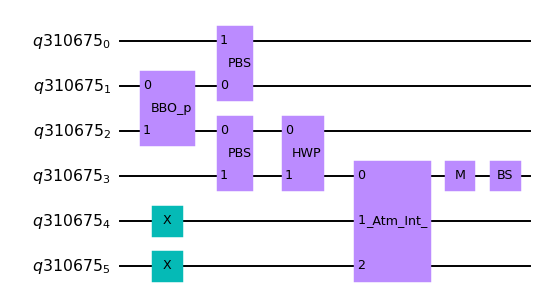

In [95]:
def qc_QCRWZ_out(th):
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr, name = 'QCR')
    qc_BBO_p_ = qc_BBO_p(th); qc.append(qc_BBO_p_, [qr[1],qr[2]])             # BBO_p
    #qc_QWP_ = qc_QWP(); qc.append(qc_QWP_, [qr[1]])                          # QWP
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[1],qr[0]])                     # PBS_A
    # IMZ
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[2],qr[3]])                     # PBS
    qc_HWP_ = qc_HWP(); qc.append(qc_HWP_, [qr[2],qr[3]])                     # HWP
    qc.x(4); qc.x(5)                                                          # Atoms's initial state
    qc_AtmInt_ = qc_AtmInt(); qc.append(qc_AtmInt_, [qr[3],qr[4],qr[5]])      # Atoms' interaction
    qc_M_ = qc_M(); qc.append(qc_M_, [qr[3]])                                 # Mirrors
    #qc_PS_ = qc_PS(ph); qc.append(qc_PS_, [qr[3]])                           # Phase
    qc_BS_ = qc_BS(); qc.append(qc_BS_, [qr[3]])                              # BS
    return qc
qc_QCRWZ_out_ = qc_QCRWZ_out(math.pi); qc_QCRWZ_out_.draw(output = 'mpl', scale = 0.7)

In [96]:
for j in range(0,d):
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
    #
    # Circuit
    #
    qc_QCRWZ_out_ = qc_QCRWZ_out(th[j]); qc.append(qc_QCRWZ_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
    #
    # Tomography
    #
    qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
    job = qiskit.execute(qstc, backend = simulator, shots=nshots)
    qstf = StateTomographyFitter(job.result(), qstc)
    #
    # rho
    #
    sim_rhoWZ_AbWZ_out[j] = qstf.fit(method='lstsq')
    sim_rhoWZ_00WZ_out[j] = projM_np(4, '00', sim_rhoWZ_AbWZ_out[j])
    sim_Phi_WZ_00WZ_out[j] = dephasing_map_2qubits_np(sim_rhoWZ_00WZ_out[j])
    sim_Irr_WZ_out[j] = entropy(sim_Phi_WZ_00WZ_out[j]) - entropy(sim_rhoWZ_00WZ_out[j])
    print(sim_Irr_WZ_out[j])
    print('j = {:2d}  - theta = {}'.format(j, th[j]))

0.0011976022687560754
j =  0  - theta = 0.01
0.0015512004273650626
j =  1  - theta = 0.16657963267948966
0.0023164474172360783
j =  2  - theta = 0.3231592653589793
0.0014316485682486432
j =  3  - theta = 0.479738898038469
0.0010458241725625622
j =  4  - theta = 0.6363185307179586
0.002098751876963456
j =  5  - theta = 0.7928981633974483
0.0014636701926272408
j =  6  - theta = 0.9494777960769379
0.0003782900176970555
j =  7  - theta = 1.1060574287564275
0.003259218980691425
j =  8  - theta = 1.2626370614359173
0.003946570858047158
j =  9  - theta = 1.419216694115407
0.0019421281977475904
j = 10  - theta = 1.5757963267948967
0.0047042786722660684
j = 11  - theta = 1.7323759594743862
0.00722159547204651
j = 12  - theta = 1.8889555921538759
0.0021092881242067013
j = 13  - theta = 2.0455352248333654
0.0049274697858495
j = 14  - theta = 2.202114857512855
0.01167826957931914
j = 15  - theta = 2.358694490192345
0.011013389208992252
j = 16  - theta = 2.5152741228718343
0.027008861504238646
j = 

## Teórico

In [97]:
thmax = math.pi-0.01;   dth = thmax/20; th = np.arange(0.01, thmax+dth, dth); d = th.shape[0]
the_Irr_WZ_in                 = np.zeros(th.shape[0])
the_Irr_WZ_out                = np.zeros(th.shape[0])

In [98]:
for j in range(0,d):
    c_plus = np.cos(th[j]/2)
    c_minus = np.sqrt(1 - c_plus**2)
    the_Irr_WZ_in[j] = -1.0 * c_plus**2 * np.log2(1.0 * c_plus**2) - c_minus**2 * np.log2(c_minus**2)
    the_Irr_WZ_out[j] = 0
    print(the_Irr_WZ_in[j])

0.00041825654974191235
0.05960827160488702
0.1732975820045815
0.3131570775169316
0.4621607944535125
0.607604014273341
0.7394634336049204
0.849811316538504
0.932583510389106
0.9834895100553851
0.9999819663871292
0.9812490235560026
0.9282133180193721
0.8435331680632676
0.7316110586657141
0.5986265342290418
0.45263200118252755
0.30379873295430637
0.1650395819160478
0.05377438056525288
4.038739397709968e-31


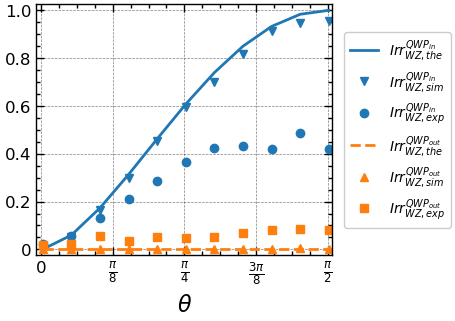

In [111]:
import string
plt.figure(figsize = (7.5, 3.2), constrained_layout = True)
#plt.subplots(figsize=(6.5, 3.2))
font = {'family': 'Verdana', 'color':  'black', 'size': 20}
#
plt.style.use(['science', 'notebook', 'grid'])
ax0 = plt.subplot(121)
plt.gca().set_xlim([-0.01,3.14])
plt.gca().set_ylim([-0.01,0.52])
#
# simulation
#
plt.plot(th[:len(th)//2+1], the_Irr_WZ_in[:len(th)//2+1], '-' ,
         color='#1f77b4', label = r'$Irr_{WZ, the}^{QWP_{in}}$')
plt.plot(th[:len(th)//2+1], sim_Irr_WZ_in[:len(th)//2+1], 'v' ,
         color='#1f77b4', label = r'$Irr_{WZ, sim}^{QWP_{in}}$')
plt.plot(th[:len(th)//2+1], ret_Irr_WZ_in[:len(th)//2+1], 'o' ,
         color='#1f77b4', label = r'$Irr_{WZ, exp}^{QWP_{in}}$')
plt.plot(th[:len(th)//2+1], the_Irr_WZ_out[:len(th)//2+1], '--',
         color='#ff7f0e', label = r'$Irr_{WZ,the}^{QWP_{out}}$')
plt.plot(th[:len(th)//2+1], sim_Irr_WZ_out[:len(th)//2+1], '^',
         color='#ff7f0e', label = r'$Irr_{WZ,sim}^{QWP_{out}}$')
plt.plot(th[:len(th)//2+1], ret_Irr_WZ_out[:len(th)//2+1], 's',
         color='#ff7f0e', label = r'$Irr_{WZ,exp}^{QWP_{out}}$')
#
#
plt.legend(bbox_to_anchor=(1.22, 0.5), loc='center',
           borderaxespad=0, fontsize=10)
#, frameon=False, handlelength=1.5
plt.xlabel(r'$\theta$')
tick_posx= [0, np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2]
#, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4, 2*np.pi]
labelsx = ['0', r'$\frac{\pi}{8}$', r'$\frac{\pi}{4}$',
           r'$\frac{3\pi}{8}$', r'$\frac{\pi}{2}$']
#, r'$\frac{3\pi}{4}$', r'$\pi$', r'$\frac{5\pi}{4}$'
#, r'$\frac{3\pi}{2}$', r'$\frac{7\pi}{4}$', r'$2\pi$']
tick_posy= [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labelsy = ['0', '0.2', '0.4', '0.6', '0.8', '1.0']
#tick_posx= [0, 5]
#labelsx = ['0', '5']
plt.xlim([-0.025, np.pi/2+0.025])
plt.ylim([-0.025, 1.025])
plt.xticks(tick_posx, labelsx)
plt.yticks(tick_posy, labelsy)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.tick_params('y', labelleft=False)
#ax1.text(-0.1, 1.1, string.ascii_uppercase[1], transform=ax1.transAxes, 
#            size=20, weight='bold')
#
#plt.tight_layout()
plt.savefig('zgraph_WZ.pdf', format='pdf', dpi = 1200, bbox_inches='tight')
plt.show()

# Mitigação

In [100]:
from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter

## Mitigação $WZ_{in}$

In [101]:
thmax = math.pi-0.01;   dth = thmax/20; th = np.arange(0.01, thmax+dth, dth); d = th.shape[0]
mit_rhoWZ_AbWZ_in             = np.zeros(th.shape[0], dtype=object)
mit_rhoWZ_AbWZ_out            = np.zeros(th.shape[0], dtype=object)
mit_rhoWZ_0bWZ_in             = np.zeros(th.shape[0], dtype=object)
mit_rhoWZ_0bWZ_out            = np.zeros(th.shape[0], dtype=object)
mit_Phi_WZ_0bWZ_in            = np.zeros(th.shape[0], dtype=object)
mit_Phi_WZ_0bWZ_out           = np.zeros(th.shape[0], dtype=object)
mit_Irr_WZ_in                 = np.zeros(th.shape[0])
mit_Irr_WZ_out                = np.zeros(th.shape[0])

### Retrieve do job da mitigação

In [102]:
print(device)
qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
qubit_list = [1,3,4,5] # os qubits para os quais aplicaremos calibracao de medidas
meas_calibs, state_labels = complete_meas_cal(qubit_list = qubit_list, qr = qr)
job_ret_WZ_in = device.retrieve_job('chdn6tim9ctescqge6gg')
print(job_ret_WZ_in.job_id())
job_monitor(job_ret_WZ_in)
meas_fitter = CompleteMeasFitter(job_ret_WZ_in.result(), state_labels)

ibm_nairobi
chdn6tim9ctescqge6gg
Job Status: job has successfully run


In [108]:
print(device)
for j in range(0, d):
    print(list_ids_WZ_in_[j])
    job_ret_WZ_in = device.retrieve_job(list_ids_WZ_in_[j])
    mitigated_results_WZ_in = meas_fitter.filter.apply(job_ret_WZ_in.result())
    qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]]) # circuit for state tomography
    qstf_mit_WZ_in = StateTomographyFitter(mitigated_results_WZ_in, qstc)
    print(job_ret_WZ_in.job_id())
    #
    # rho
    #
    mit_rhoWZ_AbWZ_in[j] = qstf_mit_WZ_in.fit(method='lstsq')
    #
    mit_rhoWZ_0bWZ_in[j] = projM_np(4, '00', mit_rhoWZ_AbWZ_in[j])
    mit_Phi_WZ_0bWZ_in[j] = dephasing_map_2qubits_np(mit_rhoWZ_0bWZ_in[j])
    mit_Irr_WZ_in[j] = entropy(mit_Phi_WZ_0bWZ_in[j]) - entropy(mit_rhoWZ_0bWZ_in[j])
    print(mit_Irr_WZ_in[j])
    print('j = {:2d}  - theta = {}'.format(j, th[j]))

ibm_nairobi
chflp5g4sb77opise4h0
chflp5g4sb77opise4h0
0.017788977091933833
j =  0  - theta = 0.01
chfmupf9targ2vqg4ovg
chfmupf9targ2vqg4ovg
0.07565547616572255
j =  1  - theta = 0.16657963267948966
chfn93vppn69h5qgh9bg
chfn93vppn69h5qgh9bg
0.22087407509017132
j =  2  - theta = 0.3231592653589793
chfq84nppn69h5qidi8g
chfq84nppn69h5qidi8g
0.3387184622827333
j =  3  - theta = 0.479738898038469
chfu8ar66hmpifvk570g
chfu8ar66hmpifvk570g
0.5155388884158963
j =  4  - theta = 0.6363185307179586
chg26i84sb77opj32t40
chg26i84sb77opj32t40
0.6170717985153327
j =  5  - theta = 0.7928981633974483
chg4bpj66hmpifvmr7cg
chg4bpj66hmpifvmr7cg
0.7091331281505009
j =  6  - theta = 0.9494777960769379
chg4vseo5i9gdbbtoivg
chg4vseo5i9gdbbtoivg
0.8252539576838096
j =  7  - theta = 1.1060574287564275
chn7f8cnsmp20v4ndlsg
chn7f8cnsmp20v4ndlsg
0.82127854745412
j =  8  - theta = 1.2626370614359173
chg9h2vppn69h5qps3r0
chg9h2vppn69h5qps3r0
0.867003442097502
j =  9  - theta = 1.419216694115407
chg9vh04sb77opj7690g
c

## Mitigação $WZ_{out}$

### Retrieve do job da mitigação

In [104]:
print(device)
for j in range(0, d):
    print(list_ids_WZ_out_[j])
    job_ret_WZ_out = device.retrieve_job(list_ids_WZ_out_[j])
    mitigated_results_WZ_out = meas_fitter.filter.apply(job_ret_WZ_out.result())
    qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]]) # circuit for state tomography
    qstf_mit_WZ_out = StateTomographyFitter(mitigated_results_WZ_out, qstc)
    print(job_ret_WZ_out.job_id())
    #
    # rho
    #
    mit_rhoWZ_AbWZ_out[j] = qstf_mit_WZ_out.fit(method='lstsq')
    #
    mit_rhoWZ_0bWZ_out[j] = projM_np(4, '00', mit_rhoWZ_AbWZ_out[j])
    mit_Phi_WZ_0bWZ_out[j] = dephasing_map_2qubits_np(mit_rhoWZ_0bWZ_out[j])
    mit_Irr_WZ_out[j] = entropy(mit_Phi_WZ_0bWZ_out[j]) - entropy(mit_rhoWZ_0bWZ_out[j])
    print(mit_Irr_WZ_out[j])
    print('j = {:2d}  - theta = {}'.format(j, th[j]))

ibm_nairobi
chgnhbfppn69h5r1qlkg
chgnhbfppn69h5r1qlkg
0.00990431167518574
j =  0  - theta = 0.01
chgumofppn69h5r5idhg
chgumofppn69h5r5idhg
0.01308344256173155
j =  1  - theta = 0.16657963267948966
chhcchnppn69h5rfrs60
chhcchnppn69h5rfrs60
0.05310988336231254
j =  2  - theta = 0.3231592653589793
chhrl12ae4cj9g89p1g0
chhrl12ae4cj9g89p1g0
0.023372352077162317
j =  3  - theta = 0.479738898038469
chhsgk46f7i49rudfnf0
chhsgk46f7i49rudfnf0
0.039571014552587214
j =  4  - theta = 0.6363185307179586
chhsiviae4cj9g8b6ls0
chhsiviae4cj9g8b6ls0
0.045295461895920375
j =  5  - theta = 0.7928981633974483
chhst86pqnphtdr8mgm0
chhst86pqnphtdr8mgm0
0.051367465554802816
j =  6  - theta = 0.9494777960769379
chhsvdepqnphtdr8psa0
chhsvdepqnphtdr8psa0
0.0909620785350016
j =  7  - theta = 1.1060574287564275
chht2746f7i49rueb0i0
chht2746f7i49rueb0i0
0.10448872716100693
j =  8  - theta = 1.2626370614359173
chht4bc6f7i49ruee6o0
chht4bc6f7i49ruee6o0
0.11159871533322263
j =  9  - theta = 1.419216694115407
chhtafj7ca

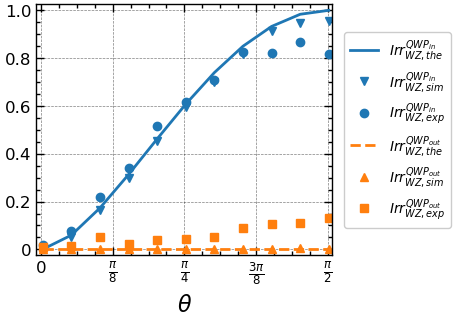

In [110]:
import string
plt.figure(figsize = (7.5, 3.2), constrained_layout = True)
#plt.subplots(figsize=(6.5, 3.2))
font = {'family': 'Verdana', 'color':  'black', 'size': 20}
#
plt.style.use(['science', 'notebook', 'grid'])
ax0 = plt.subplot(121)
plt.gca().set_xlim([-0.01,3.14])
plt.gca().set_ylim([-0.01,0.52])
#
# simulation
#
plt.plot(th[:len(th)//2+1], the_Irr_WZ_in[:len(th)//2+1], '-' ,
         color='#1f77b4', label = r'$Irr_{WZ, the}^{QWP_{in}}$')
plt.plot(th[:len(th)//2+1], sim_Irr_WZ_in[:len(th)//2+1], 'v' ,
         color='#1f77b4', label = r'$Irr_{WZ, sim}^{QWP_{in}}$')
plt.plot(th[:len(th)//2+1], mit_Irr_WZ_in[:len(th)//2+1], 'o' ,
         color='#1f77b4', label = r'$Irr_{WZ, exp}^{QWP_{in}}$')
plt.plot(th[:len(th)//2+1], the_Irr_WZ_out[:len(th)//2+1], '--',
         color='#ff7f0e', label = r'$Irr_{WZ,the}^{QWP_{out}}$')
plt.plot(th[:len(th)//2+1], sim_Irr_WZ_out[:len(th)//2+1], '^',
         color='#ff7f0e', label = r'$Irr_{WZ,sim}^{QWP_{out}}$')
plt.plot(th[:len(th)//2+1], mit_Irr_WZ_out[:len(th)//2+1], 's',
         color='#ff7f0e', label = r'$Irr_{WZ,exp}^{QWP_{out}}$')
#
#
plt.legend(bbox_to_anchor=(1.22, 0.5), loc='center',
           borderaxespad=0, fontsize=10)
#, frameon=False, handlelength=1.5
plt.xlabel(r'$\theta$')
tick_posx= [0, np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2]
#, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4, 2*np.pi]
labelsx = ['0', r'$\frac{\pi}{8}$', r'$\frac{\pi}{4}$',
           r'$\frac{3\pi}{8}$', r'$\frac{\pi}{2}$']
#, r'$\frac{3\pi}{4}$', r'$\pi$', r'$\frac{5\pi}{4}$'
#, r'$\frac{3\pi}{2}$', r'$\frac{7\pi}{4}$', r'$2\pi$']
tick_posy= [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labelsy = ['0', '0.2', '0.4', '0.6', '0.8', '1.0']
#tick_posx= [0, 5]
#labelsx = ['0', '5']
plt.xlim([-0.025, np.pi/2+0.025])
plt.ylim([-0.025, 1.025])
plt.xticks(tick_posx, labelsx)
plt.yticks(tick_posy, labelsy)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.tick_params('y', labelleft=False)
#ax1.text(-0.1, 1.1, string.ascii_uppercase[1], transform=ax1.transAxes, 
#            size=20, weight='bold')
#
#plt.tight_layout()
plt.savefig('zgraph_WZ.pdf', format='pdf', dpi = 1200, bbox_inches='tight')
plt.show()

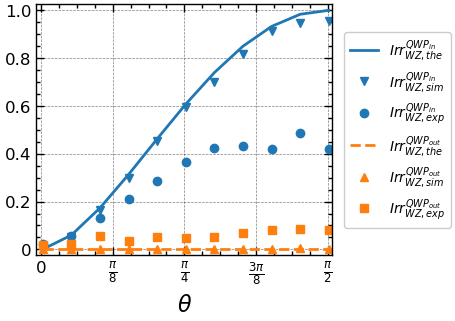

<Figure size 720x600 with 0 Axes>

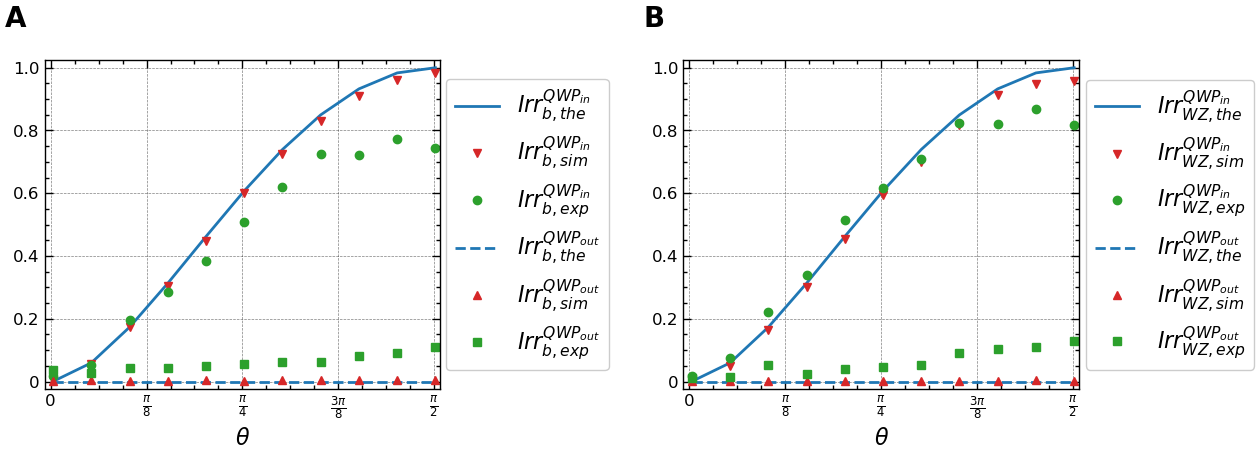

In [132]:
import string
plt.figure(figsize = (7.2,6), constrained_layout = True)
plt.subplots(figsize=(13, 4.79))
font = {'family': 'Verdana', 'color':  'black', 'size': 20}
#
#
# FIRST GRAPH
#
#
ax0 = plt.subplot(121)
plt.style.use(['science', 'notebook', 'grid'])
plt.gca().set_xlim([-0.01,6.28])
plt.gca().set_ylim([-0.01,0.52])
#
# b
#
plt.plot(th[:len(th)//2+1], the_Irr_b_in[:len(th)//2+1], '-' ,
         color='#1f77b4', label = r'$Irr_{b, the}^{QWP_{in}}$')
plt.plot(th[:len(th)//2+1], sim_Irr_b_in[:len(th)//2+1], 'v' ,
         color='#d62728', label = r'$Irr_{b, sim}^{QWP_{in}}$')
plt.plot(th[:len(th)//2+1], mit_Irr_b_in[:len(th)//2+1], 'o' ,
         color='#2ca02c', label = r'$Irr_{b, exp}^{QWP_{in}}$')
plt.plot(th[:len(th)//2+1], the_Irr_b_out[:len(th)//2+1], '--',
         color='#1f77b4', label = r'$Irr_{b,the}^{QWP_{out}}$')
plt.plot(th[:len(th)//2+1], sim_Irr_b_out[:len(th)//2+1], '^',
         color='#d62728', label = r'$Irr_{b,sim}^{QWP_{out}}$')
plt.plot(th[:len(th)//2+1], mit_Irr_b_out[:len(th)//2+1], 's',
         color='#2ca02c', label = r'$Irr_{b,exp}^{QWP_{out}}$')
#
# Inseri as letras para identificar os gráficos
#
ax0.text(-0.1, 1.1, string.ascii_uppercase[0], transform=ax0.transAxes, 
            size=20, weight='bold')
#
# subplot configs
#
plt.legend(bbox_to_anchor=(1.22, 0.5), loc='center',
           borderaxespad=0, fontsize=16)
plt.xlabel(r'$\theta$')
tick_posx= [0, np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2]
labelsx = ['0', r'$\frac{\pi}{8}$', r'$\frac{\pi}{4}$',
           r'$\frac{3\pi}{8}$', r'$\frac{\pi}{2}$']
tick_posy= [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labelsy = ['0', '0.2', '0.4', '0.6', '0.8', '1.0']
plt.xlim([-0.025, np.pi/2+0.025])
plt.ylim([-0.025, 1.025])
plt.xticks(tick_posx, labelsx)
plt.yticks(tick_posy, labelsy)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#
#
# SECOND GRAPH
#
#
ax1 = plt.subplot(122, sharey = ax0)
plt.style.use(['science', 'notebook', 'grid'])
plt.gca().set_xlim([-0.01,6.28])
plt.gca().set_ylim([-0.01,0.52])
#
# WZ
#
plt.plot(th[:len(th)//2+1], the_Irr_WZ_in[:len(th)//2+1], '-' ,
         color='#1f77b4', label = r'$Irr_{WZ, the}^{QWP_{in}}$')
plt.plot(th[:len(th)//2+1], sim_Irr_WZ_in[:len(th)//2+1], 'v' ,
         color='#d62728', label = r'$Irr_{WZ, sim}^{QWP_{in}}$')
plt.plot(th[:len(th)//2+1], mit_Irr_WZ_in[:len(th)//2+1], 'o' ,
         color='#2ca02c', label = r'$Irr_{WZ, exp}^{QWP_{in}}$')
plt.plot(th[:len(th)//2+1], the_Irr_WZ_out[:len(th)//2+1], '--',
         color='#1f77b4', label = r'$Irr_{WZ,the}^{QWP_{out}}$')
plt.plot(th[:len(th)//2+1], sim_Irr_WZ_out[:len(th)//2+1], '^',
         color='#d62728', label = r'$Irr_{WZ,sim}^{QWP_{out}}$')
plt.plot(th[:len(th)//2+1], mit_Irr_WZ_out[:len(th)//2+1], 's',
         color='#2ca02c', label = r'$Irr_{WZ,exp}^{QWP_{out}}$')
#
# Inseri as letras para identificar os gráficos
#
ax1.text(-0.1, 1.1, string.ascii_uppercase[1], transform=ax1.transAxes, 
            size=20, weight='bold')
#
# subplot configs
#
plt.legend(bbox_to_anchor=(1.23, 0.5), loc='center',
           borderaxespad=0, fontsize=16)
plt.xlabel(r'$\theta$')
tick_posx= [0, np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2]
labelsx = ['0', r'$\frac{\pi}{8}$', r'$\frac{\pi}{4}$',
           r'$\frac{3\pi}{8}$', r'$\frac{\pi}{2}$']
tick_posy= [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labelsy = ['0', '0.2', '0.4', '0.6', '0.8', '1.0']
plt.xlim([-0.025, np.pi/2+0.025])
plt.ylim([-0.025, 1.025])
plt.xticks(tick_posx, labelsx)
plt.yticks(tick_posy, labelsy)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#
# GENERAL CONFIGS AND SAVES
#
plt.tight_layout()
plt.savefig('zgraph_b_and_WZ.pdf', format='pdf', dpi = 1200, bbox_inches='tight')
plt.show()

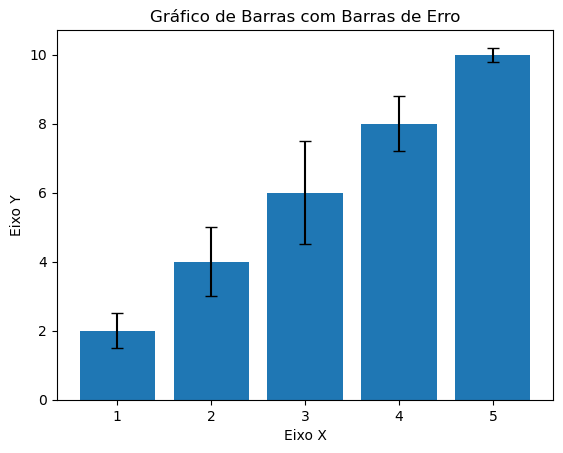

In [1]:
import matplotlib.pyplot as plt

# Dados do gráfico
x = [1, 2, 3, 4, 5]  # Valores no eixo x
y = [2, 4, 6, 8, 10]  # Valores no eixo y
error = [0.5, 1, 1.5, 0.8, 0.2]  # Valores das barras de erro

# Criar o gráfico de barras com barras de erro
plt.bar(x, y, yerr=error, capsize=4)

# Configurar os rótulos dos eixos
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')

# Configurar o título do gráfico
plt.title('Gráfico de Barras com Barras de Erro')

# Exibir o gráfico
plt.show()
